<h1 align=center><font size = 6>Telkom Assignment 2</font></h1>



<p><b>Prepared by</b> : Dyah Diwasasri Ratnaningtyas <br>
<b>Last Updated</b> : 31 January 2021 <br>
    <b>Description</b> : This project considered as Telkom Assignment 2 of Hacktiv8 Introduction to Python for Data Science Batch 47. The aim of this project is to introduce the data visualization with Python as concrete and as consistent as possible. The dataset that will be used is Training Feedback Data 2020 from Telkom Data Bay. The result of this project is for training purpose only.</p>

# 1. Data Preprocessing

In this section, the dataset that will be working on later must be preprocess first.

In [126]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

import scipy.stats as stats
import random
import warnings
import statsmodels.api as sm

%matplotlib inline

In [127]:
#Fetching CSV data from dataset folder
training = pd.read_csv('./dataset/Feedback_Lat_2020.csv')

In [128]:
#View the top 5 rows of the dataset using the head() function
training.head(5)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
#Displaying data types for getting basic information about this dataframe
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nama Pelatihan                     1581 non-null   object 
 1   Objid Pelatihan                    1581 non-null   int64  
 2   Category                           1581 non-null   object 
 3   Tipe                               895 non-null    object 
 4   Lokasi Pelatihan                   1447 non-null   object 
 5   Provider                           1480 non-null   object 
 6   Academy Event                      1459 non-null   object 
 7   Location                           1514 non-null   object 
 8   Provider Category                  1239 non-null   object 
 9   Event Type                         1526 non-null   object 
 10  Status                             1519 non-null   object 
 11  Tgl Mulai                          1581 non-null   objec

In [130]:
#Showing basics statistic of data
training.describe()

,Objid Pelatihan,JML Peserta,JML Confirmed,JML Peserta Hadir,JML UBPP Inst,JML UBPP Delivery,UBPP Inst,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
count,1.581000e+03,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1539.000000,1581.000000,1581.000000,1581.0,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,8.279691e+07,32.163188,18.940544,23.476913,9.270715,12.886148,41.624997,27.296420,51.224092,0.0,52.388545,27.168355,52.532796,39.369564,50.628419,52.671012,52.279791
std,4.399535e+06,94.044293,64.475255,61.810226,20.698898,28.014751,41.650135,38.448665,43.125272,0.0,43.819904,38.381787,43.979533,40.709386,42.685038,44.111036,43.769020
min,8.011078e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000
25%,8.011266e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.011346e+07,9.000000,3.000000,5.000000,1.000000,2.000000,61.670000,0.000000,80.000000,0.0,83.330000,0.000000,83.630000,42.860000,77.780000,83.750000,83.250000
75%,9.000375e+07,29.000000,21.000000,25.000000,13.000000,16.000000,82.915000,71.980000,89.090000,0.0,90.000000,70.710000,90.100000,75.000000,88.330000,90.000000,90.000000
max,9.000456e+07,1576.000000,1209.000000,790.000000,336.000000,343.000000,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [131]:
#Copy data
training_data = training.copy()

In [132]:
#Drop column that will not be used in this project
training_data.drop(['Tipe','Provider Category'], inplace=True, axis=1)

In [133]:
#Manipulating columns by renaming column name
training_data = training_data.rename(
    columns={"Nama Pelatihan" : "training_name", 
             "Objid Pelatihan" : "objid",
             "Category" : "category",
             "Lokasi Pelatihan" : "city",
             "Provider" : "provider",
             "Academy Event" : "academy",
             "Location" : "location",
             "Event Type" : "training_type",
             "Status" : "status",
             "Tgl Mulai" : "start_date",
             "Tgl Selesai" : "end_date",
             "JML Peserta" : "total_participant",
             "JML Confirmed" : "total_confirmed",
             "JML Peserta Hadir" : "total_attendance",
             "JML UBPP Inst" : "total_feed_instructor",
             "JML UBPP Delivery" : "total_feed_delivery",
             "UBPP Inst" : "feed_instructor",
             "UBPP Akom" : "feed_acomodation",
             "UBPP Sarana" : "feed_facility",
             "UBPP Laborat" : "feed_lab",
             "UBPP Penyelenggaraan" : "feed_delivery",
             "UBPP Kafetaria" : "feed_cafe",
             "UBPP Materi" : "feed_material",
             "Net Promotor Score" : "nps",
             "Customer Satisfaction" : "cs",
             "First Response & Average Handling" : "frah",
             "Customer Effort Score" : "ces"           
             }
)

In [134]:
#Set academy as index then displaying data types
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1581 non-null   object 
 1   objid                  1581 non-null   int64  
 2   category               1581 non-null   object 
 3   city                   1447 non-null   object 
 4   provider               1480 non-null   object 
 5   academy                1459 non-null   object 
 6   location               1514 non-null   object 
 7   training_type          1526 non-null   object 
 8   status                 1519 non-null   object 
 9   start_date             1581 non-null   object 
 10  end_date               1581 non-null   object 
 11  total_participant      1581 non-null   int64  
 12  total_confirmed        1581 non-null   int64  
 13  total_attendance       1581 non-null   int64  
 14  total_feed_instructor  1581 non-null   int64  
 15  tota

In [135]:
#Fill missing value in column feed_instructor with data mean
training_data['feed_instructor'].fillna((training_data['feed_instructor'].mean()), inplace=True)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1581 non-null   object 
 1   objid                  1581 non-null   int64  
 2   category               1581 non-null   object 
 3   city                   1447 non-null   object 
 4   provider               1480 non-null   object 
 5   academy                1459 non-null   object 
 6   location               1514 non-null   object 
 7   training_type          1526 non-null   object 
 8   status                 1519 non-null   object 
 9   start_date             1581 non-null   object 
 10  end_date               1581 non-null   object 
 11  total_participant      1581 non-null   int64  
 12  total_confirmed        1581 non-null   int64  
 13  total_attendance       1581 non-null   int64  
 14  total_feed_instructor  1581 non-null   int64  
 15  tota

In [136]:
#Remove missing values
training_data = training_data.dropna()
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1569
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   training_name          1395 non-null   object 
 1   objid                  1395 non-null   int64  
 2   category               1395 non-null   object 
 3   city                   1395 non-null   object 
 4   provider               1395 non-null   object 
 5   academy                1395 non-null   object 
 6   location               1395 non-null   object 
 7   training_type          1395 non-null   object 
 8   status                 1395 non-null   object 
 9   start_date             1395 non-null   object 
 10  end_date               1395 non-null   object 
 11  total_participant      1395 non-null   int64  
 12  total_confirmed        1395 non-null   int64  
 13  total_attendance       1395 non-null   int64  
 14  total_feed_instructor  1395 non-null   int64  
 15  tota

In [137]:
#Specifying data types
training_data['start_date'] = pd.to_datetime(training_data['start_date'])
training_data['end_date'] = pd.to_datetime(training_data['end_date'])
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1569
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   training_name          1395 non-null   object        
 1   objid                  1395 non-null   int64         
 2   category               1395 non-null   object        
 3   city                   1395 non-null   object        
 4   provider               1395 non-null   object        
 5   academy                1395 non-null   object        
 6   location               1395 non-null   object        
 7   training_type          1395 non-null   object        
 8   status                 1395 non-null   object        
 9   start_date             1395 non-null   datetime64[ns]
 10  end_date               1395 non-null   datetime64[ns]
 11  total_participant      1395 non-null   int64         
 12  total_confirmed        1395 non-null   int64         
 13  tot

In [138]:
training_data.isnull().sum()

training_name            0
objid                    0
category                 0
city                     0
provider                 0
academy                  0
location                 0
training_type            0
status                   0
start_date               0
end_date                 0
total_participant        0
total_confirmed          0
total_attendance         0
total_feed_instructor    0
total_feed_delivery      0
feed_instructor          0
feed_acomodation         0
feed_facility            0
feed_lab                 0
feed_delivery            0
feed_cafe                0
feed_material            0
nps                      0
cs                       0
frah                     0
ces                      0
dtype: int64

In [139]:
#change date time of start date then add month' column for each data
training_data['start_date'] = pd.to_datetime(training_data['start_date'])
training_data['month'] = pd.DatetimeIndex(training_data['start_date']).month
training_data.head()

,training_name,objid,category,city,provider,academy,location,training_type,status,start_date,...,feed_facility,feed_lab,feed_delivery,feed_cafe,feed_material,nps,cs,frah,ces,month
0,Social Media Ads & Analytic,80114181,LAT,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,On Going,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
1,CISM,80114269,LAT,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),Public,On Going,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,Programmer Development Course Amoeba,80114271,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
3,Business Analytics Amoeba,80114280,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
4,Online UX Design Course Amoeba,80114281,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


# 2. Hypothesis

**Hypothesis**

"Training with LAT category is more likely to achieve NPS+100 rather than training with NON LAT category."

# 3. Statistic Method

## 3.1 Measure of Central Tendency : Mean

In [140]:
#mean values in nps column
mean = training_data['nps'].mean()
mean

43.90131182795699

## 3.2 Measure of Central Tendency : Median

In [141]:
#median values in nps column
median = training_data['nps'].median()
median

50.0

## 3.3 Measure of Central Tendency : Modus

In [142]:
#mode values in nps column
mode = training_data['nps'].mode()
mode

0    0.0
dtype: float64

## 3.4 Measure of Spread : Range

In [143]:
#display range between max and min element in nps data
np.ptp(training_data['nps'])

200.0

## 3.5 Measure of Spread : Variance 

In [144]:
#display variance in nps data
np.var(training_data['nps'])

1640.165364945774

## 3.6 Measure of Spread : Standard Deviation 

In [145]:
#display standard deviation in nps data
np.std(training_data['nps'])

40.49895510930836

## 3.7 Probability Distribution

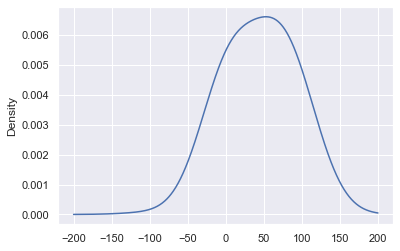

In [146]:
#create norm distribution
nps_series = pd.Series(training_data['nps'])
ax=nps_series.plot.kde(bw_method=0.9)

From the distribution above we can conclude that the distribution of NPS is normal

## 3.8 Confidence Intervals

In [147]:
#define z score
z_score = 1.96

#replace LAT & NON LAT in column category into 1 and 0
training_data['train_cat'] = training_data['category'].replace({'LAT': 1,'NON LAT' : 0})
training_data.head()

,training_name,objid,category,city,provider,academy,location,training_type,status,start_date,...,feed_lab,feed_delivery,feed_cafe,feed_material,nps,cs,frah,ces,month,train_cat
0,Social Media Ads & Analytic,80114181,LAT,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,On Going,2020-12-16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1
1,CISM,80114269,LAT,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),Public,On Going,2020-12-16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1
2,Programmer Development Course Amoeba,80114271,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1
3,Business Analytics Amoeba,80114280,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1
4,Online UX Design Course Amoeba,80114281,LAT,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,WO,2020-12-16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1


In [148]:
#drop null values and create new data frame
training_data_conf = training_data[['train_cat','nps']].dropna()

In [149]:
#check total training for both type LAT & NON LAT with nps
pd.crosstab(training_data_conf.nps, training_data_conf.train_cat)

train_cat,0,1
nps,,
-100.00,0,7
-84.48,0,1
-50.00,0,2
-33.33,0,2
-25.00,0,2
...,...,...
94.87,0,1
95.83,0,1
97.18,0,1


In [150]:
#describe data
training_data_conf.describe()

,train_cat,nps
count,1395.000000,1395.000000
mean,0.772043,43.901312
std,0.419665,40.513479
min,0.000000,-100.000000
25%,1.000000,0.000000
50%,1.000000,50.000000
75%,1.000000,77.780000
max,1.000000,100.000000


In [151]:
#count population of LAT
pop_lat = training_data_conf['train_cat'].astype(bool).sum(axis=0)

#count total population
total_pop = training_data_conf['nps'].count()

#count population of NON LAT
pop_non_lat = total_pop - pop_lat

#see data population
print(total_pop)
print(pop_lat)
print(pop_non_lat)

1395
1077
318


In [152]:
#count proportion of LAT which got nps 100
nps_lat = 198/1077
print(nps_lat)

#count proportion of NON LAT which got nps 100
nps_non_lat = 1/318
print(nps_non_lat)

0.18384401114206128
0.0031446540880503146


In [153]:
#count standard error of LAT getting NPS +100
se_lat = np.sqrt((nps_lat *(1 - nps_lat))/pop_lat)
print(se_lat)

#count standard error of NON LAT getting NPS +100
se_non_lat = np.sqrt((nps_non_lat *(1 - nps_non_lat))/pop_non_lat)
print(se_non_lat)

0.01180330087399539
0.003139705770133386


In [154]:
#count confidence interval of LAT getting NPS+100
lcb_lat = nps_lat - z_score*se_lat #lower limit of the CI LAT
ucb_lat = nps_lat + z_score*se_lat #upper limit of the CI LAT
print(lcb_lat, ucb_lat)

#count confidence interval of NON LAT getting NPS+100
lcb_non_lat = nps_non_lat - z_score*se_non_lat #lower limit of the CI NON LAT
ucb_non_lat = nps_non_lat + z_score*se_non_lat #upper limit of the CI NON LAT
print(lcb_non_lat, ucb_non_lat)

0.16070954142903032 0.20697848085509224
-0.003009169221411122 0.009298477397511752


In [155]:
#count confidence interval lAT getting NPS+100 (by using library statsmodels)
ci_lat = sm.stats.proportion_confint(pop_lat * nps_lat, pop_lat)
print(ci_lat)

#count confidence interval NON lAT getting NPS+100 (by using library statsmodels)
ci_non_lat = sm.stats.proportion_confint(pop_non_lat * nps_non_lat, pop_non_lat)
print(ci_non_lat)

(0.16070996653034017, 0.2069780557537824)
(0.0, 0.009298364319564347)


## 3.9 Hypothesis Testing

In the early section we already stated a hypothesis as stated below:

**Hypothesis**

Training with LAT category is more likely to achieve NPS+100 rather than training with NON LAT category.

**Conclusion**
After working on with the data, we can see that the from the result of Confidence Interval between LAT & NON LAT gettig NPS +100 is shown below :

CI LAT : (0.16070996653034017, 0.2069780557537824)
CI NON LAT : (0.0, 0.009298364319564347)

Confidence Interval of LAT getting NPS +100 is higher than NON LAT, so that we can coclude that hypotheis stated before : *Training with LAT category is more likely to achieve NPS+100 rather than training with NON LAT category.* can be trusted as true statement.